In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

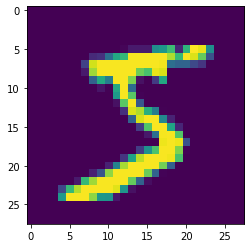

In [4]:
# Visualize the first training image
plt.imshow(X_train[0])

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
X_train.max()

255

In [8]:
X_train.min()

0

In [9]:
y_train[0]

5

In [10]:
# Scaling the train set
X_train = X_train/255

In [11]:
# Scaling the test set
X_test = X_test/255

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [13]:
# Enocder
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [14]:
# Decoder
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [15]:
autoencoder = Sequential([encoder,decoder])

In [16]:
autoencoder.compile(loss='binary_crossentropy',optimizer=SGD(learning_rate=1.5),metrics=['accuracy'])

In [17]:
autoencoder.fit(X_train, X_train, epochs=10, validation_data=(X_test, X_test))

Epoch 1/10
1875/1875 [==============================] - 36s 17ms/step - loss: 0.2546 - accuracy: 0.0804 - val_loss: 0.2213 - val_accuracy: 0.1196
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2013 - accuracy: 0.1402 - val_loss: 0.1742 - val_accuracy: 0.1797
Epoch 3/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.1654 - accuracy: 0.1906 - val_loss: 0.1558 - val_accuracy: 0.2060654 - accuracy: 0.
Epoch 4/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1539 - accuracy: 0.2070 - val_loss: 0.1466 - val_accuracy: 0.2162
Epoch 5/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1457 - accuracy: 0.2168 - val_loss: 0.1396 - val_accuracy: 0.2248
Epoch 6/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1388 - accuracy: 0.2261 - val_loss: 0.1341 - val_accuracy: 0.2237
Epoch 7/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.1337 - accuracy: 0.2333 - 

In [18]:
passed_images = autoencoder.predict(X_test[:10])

In [19]:
passed_images.shape

(10, 28, 28)

Original Image


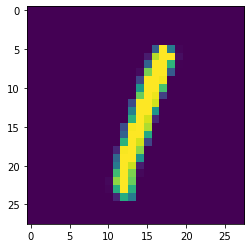

After Autoencoded Image


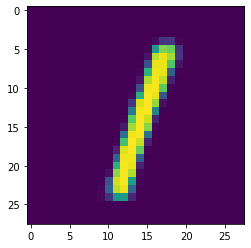

In [23]:
n = 5

print('Original Image')
plt.imshow(X_test[n])
plt.show()

print('After Autoencoded Image')
plt.imshow(passed_images[n])
plt.show()

In [ ]:
# Adding noise

In [24]:
from tensorflow.keras.layers import GaussianNoise

In [25]:
sample = GaussianNoise(0.2)

In [26]:
noisey = sample(X_test[:10], training=True)

Original Image


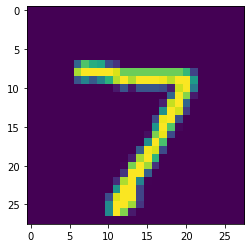

After Noise Added


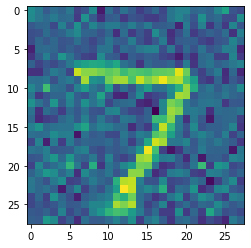

In [28]:
n = 0

print('Original Image')
plt.imshow(X_test[n])
plt.show()

print('After Noise Added')
plt.imshow(noisey[n])
plt.show()

### Noise Removal Autoencoder

In [29]:
import tensorflow as tf

In [30]:
# Encoder

tf.random.set_seed(101)
np.random.seed(101)

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))

encoder.add(GaussianNoise(0.2))

encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [31]:
# Decoder
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [32]:
noise_remover = Sequential([encoder, decoder])

In [33]:
noise_remover.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
noise_remover.fit(X_train,X_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 38s 19ms/step - loss: 0.1700 - accuracy: 0.1822
Epoch 2/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1284 - accuracy: 0.2333
Epoch 3/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1208 - accuracy: 0.2450
Epoch 4/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1163 - accuracy: 0.2530
Epoch 5/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.1129 - accuracy: 0.25870s - loss: 0.1
Epoch 6/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.1097 - accuracy: 0.2639
Epoch 7/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1072 - accuracy: 0.2691
Epoch 8/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.1053 - accuracy: 0.2722
Epoch 9/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1040 - accuracy: 0.2745
Epoch 10/10
1875/1875 [===========================

In [37]:
ten_noisey_images = sample(X_test[:10], training=True)

In [38]:
denoised_images = noise_remover(ten_noisey_images)

Original Image


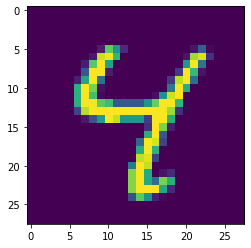

After Noise Added


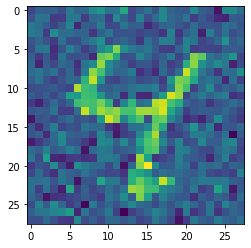

After Noise Removal


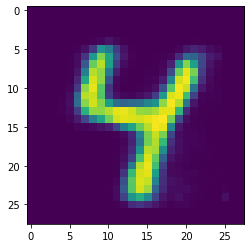

In [43]:
n = 6

print('Original Image')
plt.imshow(X_test[n])
plt.show()

print('After Noise Added')
plt.imshow(ten_noisey_images[n])
plt.show()

print('After Noise Removal')
plt.imshow(denoised_images[n])
plt.show()